# Import Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [7]:
df = pd.read_csv("dynamic_pricing[1].csv")

In [9]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# Data Analysis and EDA

In [12]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [16]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [22]:
def eda(df, column):
    if df[column].dtype == 'object':
        sns.boxplot(data = df, x = column, y = 'Historical_Cost_of_Ride')
        plt.show()

    else:
        sns.scatterplot(data = df, x = column, y = 'Historical_Cost_of_Ride')
        plt.show()

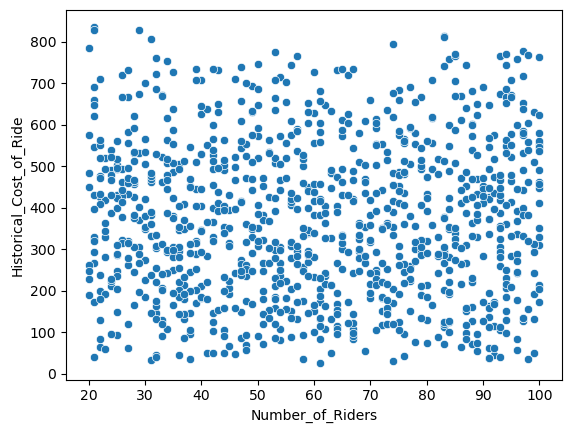

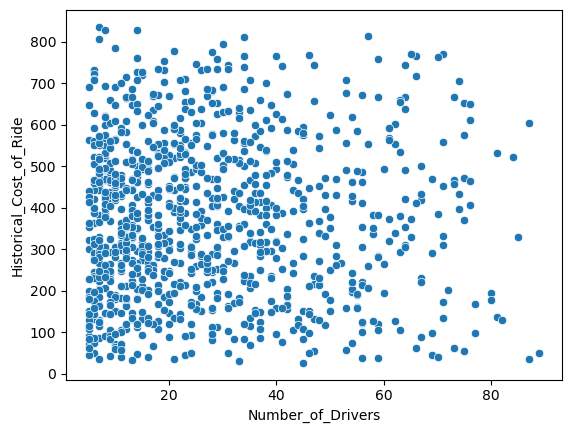

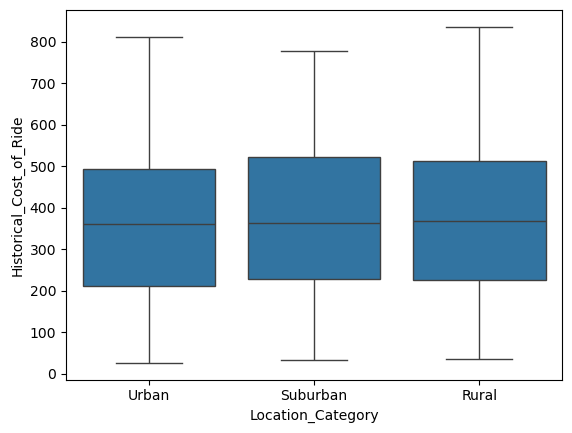

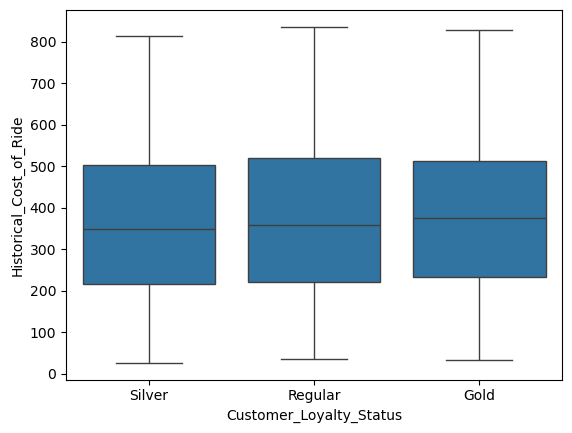

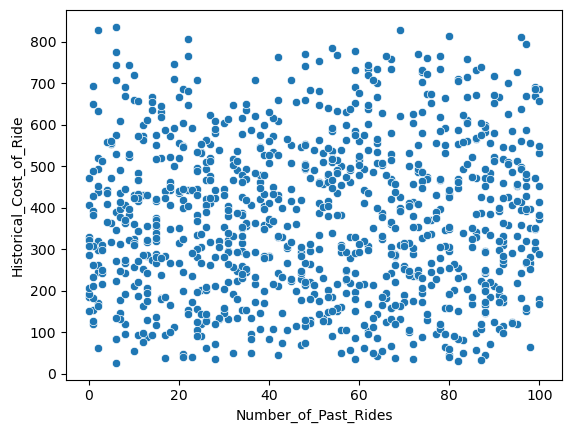

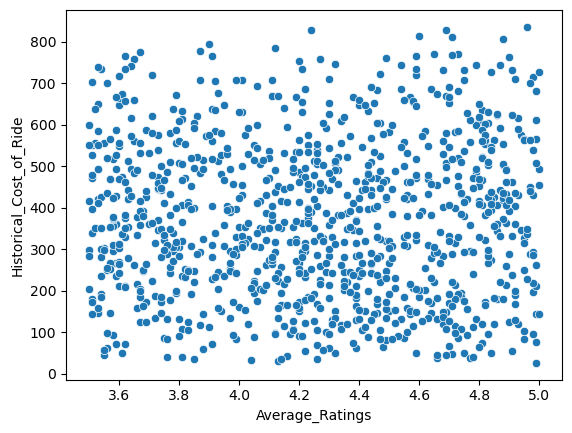

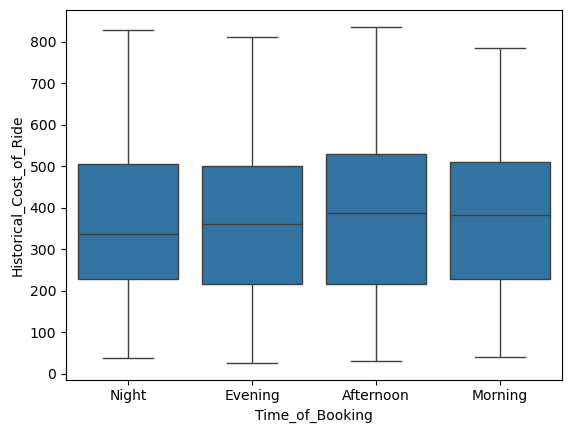

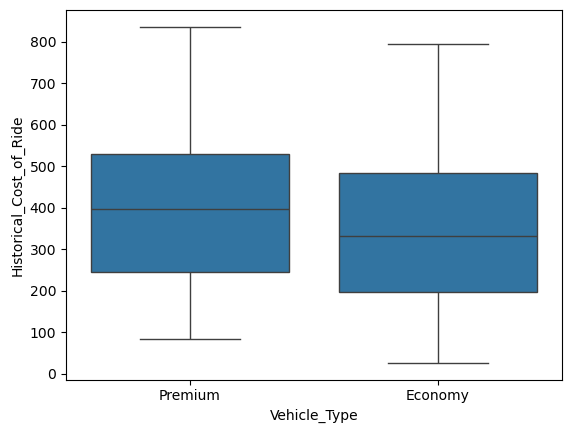

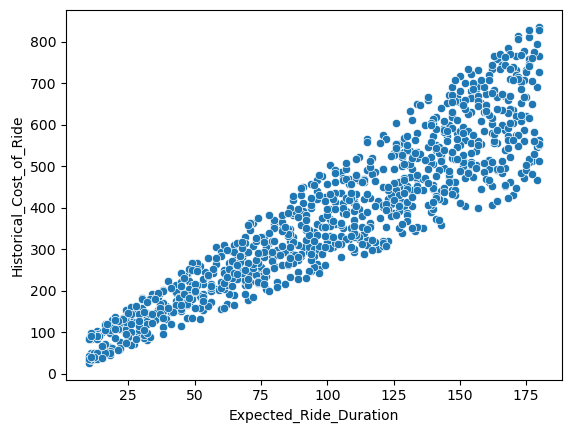

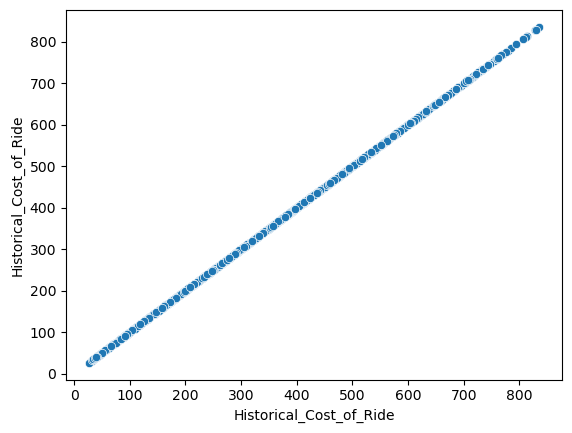

In [24]:
for column in df.columns:
    eda(df, column)

In [26]:
df.corr(numeric_only=True)

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
Number_of_Riders,1.000000,0.627016,0.029265,0.008572,-0.015856,0.005826
Number_of_Drivers,0.627016,1.000000,0.039660,0.041204,-0.024418,0.017082
Number_of_Past_Rides,0.029265,0.039660,1.000000,-0.064734,0.030679,0.035859
Average_Ratings,0.008572,0.041204,-0.064734,1.000000,-0.016968,-0.001063
Expected_Ride_Duration,-0.015856,-0.024418,0.030679,-0.016968,1.000000,0.927547
Historical_Cost_of_Ride,0.005826,0.017082,0.035859,-0.001063,0.927547,1.000000


<Axes: >

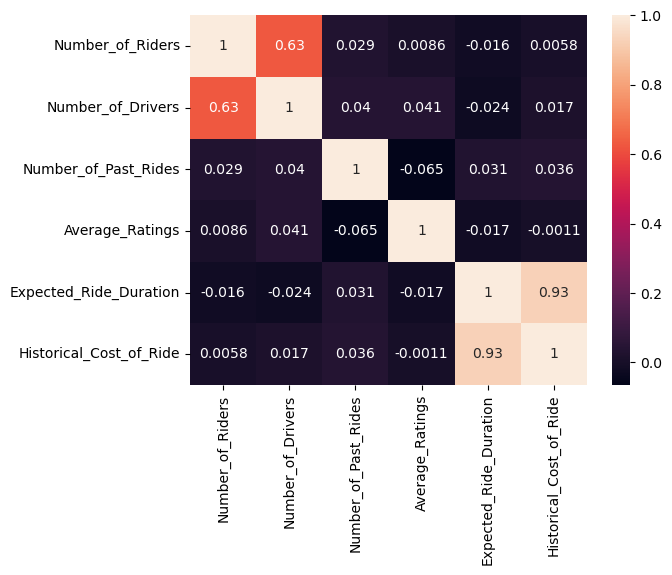

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Feature Engineering

In [42]:
X = df.drop('Historical_Cost_of_Ride',axis=1)  
y = df['Historical_Cost_of_Ride']  

In [44]:
X_new = pd.get_dummies(X,drop_first = True)  

In [46]:
X_new  

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Location_Category_Suburban,Location_Category_Urban,Customer_Loyalty_Status_Regular,Customer_Loyalty_Status_Silver,Time_of_Booking_Evening,Time_of_Booking_Morning,Time_of_Booking_Night,Vehicle_Type_Premium
0,90,45,13,4.47,90,False,True,False,True,False,False,True,True
1,58,39,72,4.06,43,True,False,False,True,True,False,False,False
2,42,31,0,3.99,76,False,False,False,True,False,False,False,True
3,89,28,67,4.31,134,False,False,True,False,False,False,False,True
4,78,22,74,3.77,149,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,23,24,4.21,11,False,True,False,False,False,True,False,True
996,84,29,92,4.55,94,False,True,True,False,False,True,False,True
997,44,6,80,4.13,40,True,False,False,False,False,False,True,True
998,53,27,78,3.63,58,True,False,True,False,False,False,True,True


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_new)

In [52]:
X_scaled

array([[ 1.25067265,  0.94045748, -1.26389491, ..., -0.57119169,
         1.61962601,  0.95692675],
       [-0.10012811,  0.62564243,  0.74981791, ..., -0.57119169,
        -0.61742649, -1.04501206],
       [-0.77552849,  0.20588904, -1.70759434, ..., -0.57119169,
        -0.61742649,  0.95692675],
       ...,
       [-0.69110344, -1.10584031,  1.02286372, ..., -0.57119169,
         1.61962601,  0.95692675],
       [-0.31119072, -0.00398766,  0.95460227, ..., -0.57119169,
         1.61962601,  0.95692675],
       [ 0.74412237,  1.88490261, -1.22976418, ..., -0.57119169,
        -0.61742649, -1.04501206]])

# Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 101)

In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

# Model Training and Error Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(y_test,y_pred)
mape = 100 * mean_absolute_percentage_error(y_test,y_pred)

In [116]:
mse

4964.354661826738

In [118]:
mape

14.01408544260633

# Feature Importance

In [125]:
feature_imp = model.feature_importances_  
feature = X_new.columns  

In [127]:
imp_df = pd.DataFrame({'Feature':feature, 'Importance':feature_imp})  

In [129]:
imp_df.sort_values('Importance', ascending=False)  

,Feature,Importance
4,Expected_Ride_Duration,0.880819
3,Average_Ratings,0.024555
1,Number_of_Drivers,0.022735
2,Number_of_Past_Rides,0.020103
0,Number_of_Riders,0.018698
12,Vehicle_Type_Premium,0.014272
7,Customer_Loyalty_Status_Regular,0.003319
11,Time_of_Booking_Night,0.003209
6,Location_Category_Urban,0.002773
8,Customer_Loyalty_Status_Silver,0.002580


<BarContainer object of 13 artists>

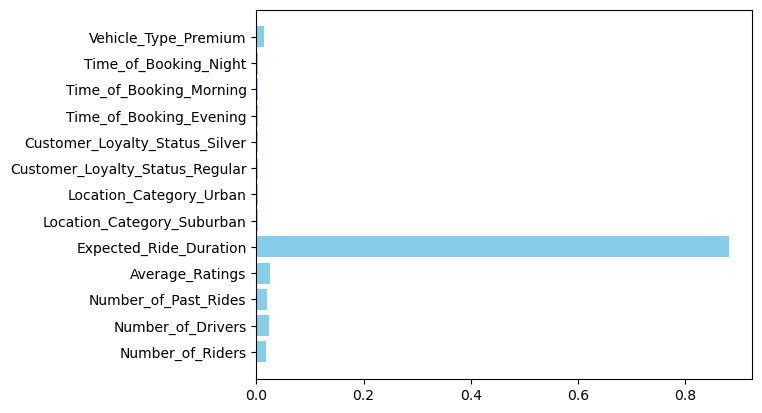

In [145]:
plt.barh(imp_df['Feature'], imp_df['Importance'], color ='skyblue')